# Generative Adversarial Networks

### Practice with MINST Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

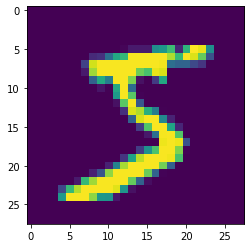

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

_

**We will work only with  a subset of the data, the zeros**

In [6]:
y_train == 0

array([False,  True, False, ..., False, False, False])

In [7]:
X_train[y_train == 0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
only_zeros = X_train[y_train == 0]

In [9]:
only_zeros.shape

(5923, 28, 28)

In [10]:
X_train.shape

(60000, 28, 28)

**We went from 60,000 to 5923**

In [11]:
only_zeros[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28, 195, 254, 254, 254, 254, 254, 255,  61,   0,   0,   0,   0,
          0,   0],
       [  

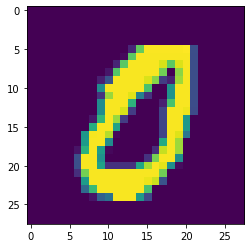

In [12]:
plt.imshow(only_zeros[10])

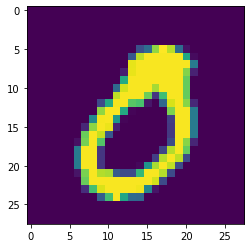

In [13]:
plt.imshow(only_zeros[9])

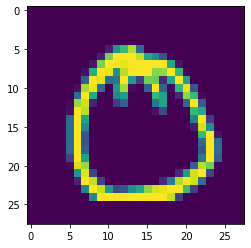

In [14]:
plt.imshow(only_zeros[1000])

___

## Model

In [15]:
import tensorflow  as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

### Discriminator

**Because they are 2d image we neet to flatten them**

**At the end in the output layer we use only one neuron because we are the discriminator tells if the image is fake or not**

In [16]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

### Generator

In [17]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))

generator.add(Reshape([28,28]))

In [18]:
GAN = Sequential([generator, discriminator])

In [19]:
discriminator.trainable = False

In [20]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

___

## Training

### Batches


In [21]:
batch_size = 32

In [22]:
my_data = only_zeros

In [23]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [24]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [25]:
epochs = 1

In [26]:
GAN.layers[0].layers

In [27]:
GAN.layers[1].layers

In [28]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    i = 0
    
    for X_batch in dataset:
        
        i = i + 1
        
        if i % 100 == 0:
            
            print(f"Currently on batch number {i} of {len(my_data)//batch_size}")
            
            
    
        # DISCRIMINATOR TRAINING PHASE
        
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

Currently on Epoch 1
Currently on batch number 100 of 185


### Training Loop

In [29]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 100 of 185
TRAINING COMPLETE


In [32]:
noise = tf.random.normal(shape=[10, codings_size])

In [33]:
noise.shape

TensorShape([10, 100])

### How does this noise looks like?

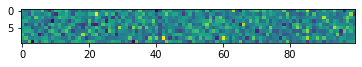

In [34]:
plt.imshow(noise)

In [35]:
images = generator(noise)

In [36]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

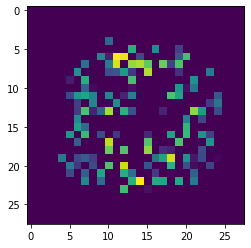

In [37]:
plt.imshow(images[0])

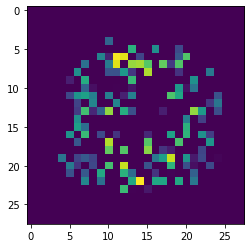

In [38]:
plt.imshow(images[1])

### Image does not evolve much because of **Mode Collapse**

The generator generates images that are intended to look like real images, while the discriminator tries to distinguish between the generated images and the real images.

**Mode collapse** is a problem that can occur when training a GAN. It **happens when the generator produces only a limited set of images, ignoring other variations in the data. In other words, the generator collapses to a small subset of possible outputs.**

For example, let's say we want to generate images of flowers. The generator might only produce images of red roses, ignoring other types of flowers or colors. This happens because the generator has found a way to trick the discriminator by producing a limited set of images that the discriminator thinks are real.

Mode collapse can be problematic because it limits the diversity and quality of the generated images. It can also make the GAN less useful for certain applications, such as generating diverse and novel images.

To avoid mode collapse, various techniques can be used, such as changing the architecture of the generator and discriminator, adjusting the hyperparameters, and using different training methods. These techniques help the GAN to explore and capture the full range of variation in the data, generating a more diverse and realistic set of images.